# Part 1: Change image from rgb to grayscale and comparison
the following cells are made to read an image from a path, split into rgb (proper order) and then change to 
grayscale according to the following standards
1.  Basic (taking a non-weighted average of the r,g,b channels, just for testing) 
2.  0.2989 *R + 0.5870 *G + 0.1140 *B    # [1] NTSC
3.  0.2627 *R + 0.6780 *G + 0.0593 *B    # [3] UHDTV


In [4]:
# importing libraries
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

In [11]:
#function that reads an image from path
def read_img_from_path(path="test images//2641.jpg"):
    image = cv2.imread(path,-1)
    return image
#function that splits rgb image into 3 channels and orders them properly
def rgb_split(image):
    b_channel, g_channel, r_channel = cv2.split(image)
    return r_channel, g_channel, b_channel
#function for combining rgb channels into one image
def rgb_combine(r,g,b):
    image = cv2.merge((r,g,b))
    return image
#change from bgr to rgb
def show_img(image, cmap = "rgb"):
    if cmap == "rgb":
        r,g,b = rgb_split(image)
        image = rgb_combine(r,g,b)
        plt.imshow(image)
    else:
        plt.imshow(image,cmap="gray")
#this function takes the RGB image and type of require conversion and returns a grayscale image
def rgb_to_grayscale(image, type = "UHDTV"):
    r,g,b = rgb_split(image)
    if type == "basic":
       return 1/3*(r+g+b) 
    if type == "NTSC":
        return 0.2989*r+0.5870*g+0.1140*b
    if type == "UHDTV":
        return 0.2627*r+0.6780*g+0.0593*b

# Part 2 generating histograms of r,g,b

In [6]:
#generates histogram for the overall image RGB
def rgb_hist_cumulative(image):
    # calculate mean value from RGB channels and flatten to 1D array
    # vals = image.mean(axis=2).flatten()
    #get the rgb channels
    r_vals, g_vals, b_vals = rgb_split(image)
    r_hist = twoD_fast_hist(r_vals)
    g_hist = twoD_fast_hist(g_vals)
    b_hist = twoD_fast_hist(b_vals)
    fig, ax = plt.subplots(2,3)
    #plot r g b histograms
    ax[0,0].bar(np.arange(0,256),r_hist,color="red")
    ax[0,1].bar(np.arange(0,256),g_hist,color="green")
    ax[0,2].bar(np.arange(0,256),b_hist,color="blue")

    #plot r g b cumulatives
    ax[1,0].bar(np.arange(0,256),np.cumsum(r_hist),color="red")
    ax[1,1].bar(np.arange(0,256),np.cumsum(g_hist),color="green")
    ax[1,2].bar(np.arange(0,256),np.cumsum(b_hist),color="blue")

    
def twoD_fast_hist(matrix):
    # calculate histogram
    values = matrix.flatten()
    counts, bins = np.histogram(values, range(257))
    return counts

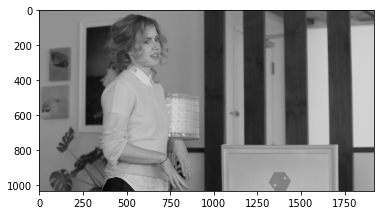

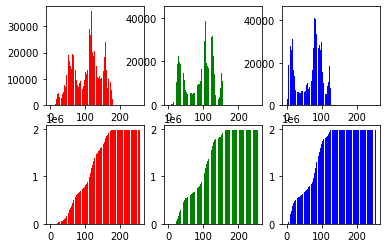

In [7]:
# show_img(read_img_from_path("test images//2641.jpg"))
img = read_img_from_path("test images//Her_105.jpg")
greyscale_img = rgb_to_grayscale(img,type="NTSC")
show_img(greyscale_img,cmap="grey")
rgb_hist_cumulative(img)

# Adding noise to image, basic as can be.
1. Uniform noise
2. Gaussian Noise
3. Salt and pepper Noise

In [8]:
#basic function that calls different functions according to chose noise type
def add_noise(image, type ="uniform");
    if type == "uniform":
        add_noise_uniform(image)
    elif type ==" gaussian":
        add_noise_gaussian(image)
    elif type == "salt and pepper":
        add_noise_sp(image)
    else:
        return"Please enter a correct noise paramtere, check function definition for more details "
# function for adding gaussian noise, I guess
def add_noise_gaussian (image):
    pass

SyntaxError: invalid syntax (1686971858.py, line 2)

In [38]:
def unifrom_noise(image):
    x, y = image.shape
    mean = 0
    max = 0.1
    noise = np.zeros((x,y), dtype=np.float64)
    for i in range(x):
        for j in range(y):
            noise[i][j] = np.random.uniform(mean,max)
    noise_img = image + noise
    # noise_img +=255
    noise_img = noise_img*255
    noise_img = np.clip(noise,0,1)
    return noise_img

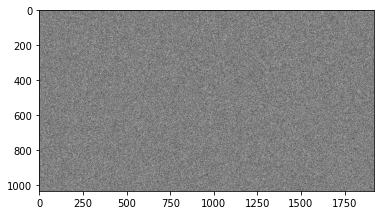

In [39]:
img = read_img_from_path("test images//Her_105.jpg")
greyscale_img  = rgb_to_grayscale(img)
uni_noise = unifrom_noise(greyscale_img)
show_img(uni_noise,cmap="gray")
# rgb_hist_cumulative(img)